In [4]:
# Core Libraries: Dataframe, Visualizations, Arrays, Models
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Auxillary Libraries
import missingno as msno # Visualizing Missing Values

# Creating my Pandas Dataframe
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_example_submission = pd.read_csv('gender_submission.csv')

Examining what's all in this file.

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df_example_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_example_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
df_example_submission.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_example_submission.shape

(418, 2)

In [11]:
df.shape

(891, 12)

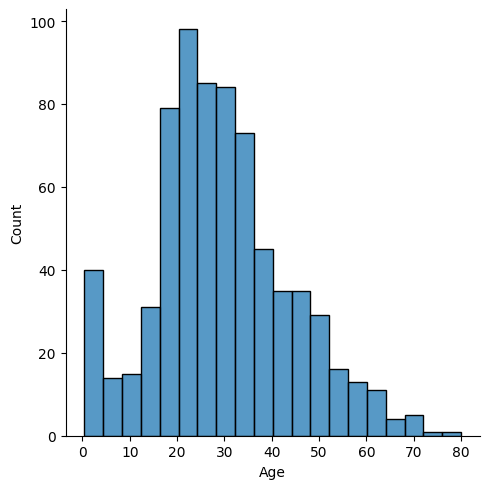

In [12]:
sns.displot(x=df['Age'])

<Axes: xlabel='Sex', ylabel='Survived'>

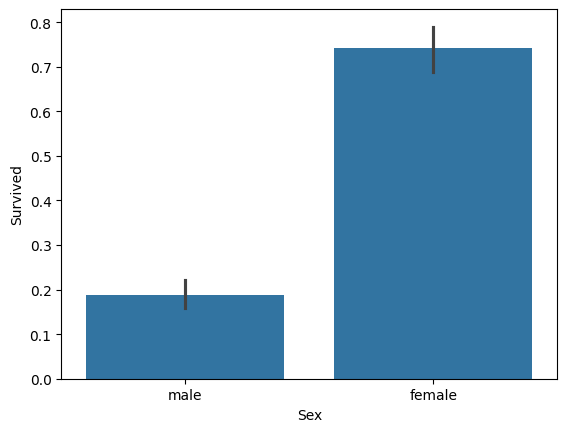

In [13]:
sns.barplot(x=df['Sex'],y=df['Survived'])

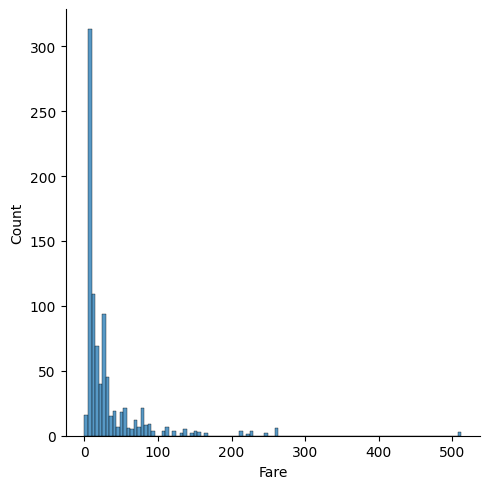

In [14]:
sns.displot(x=df['Fare'])

The models that I'll be using from Sklearn all require that 
there aren't missing values being fed into it. 

Let's see if there's columns that have missing values.

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

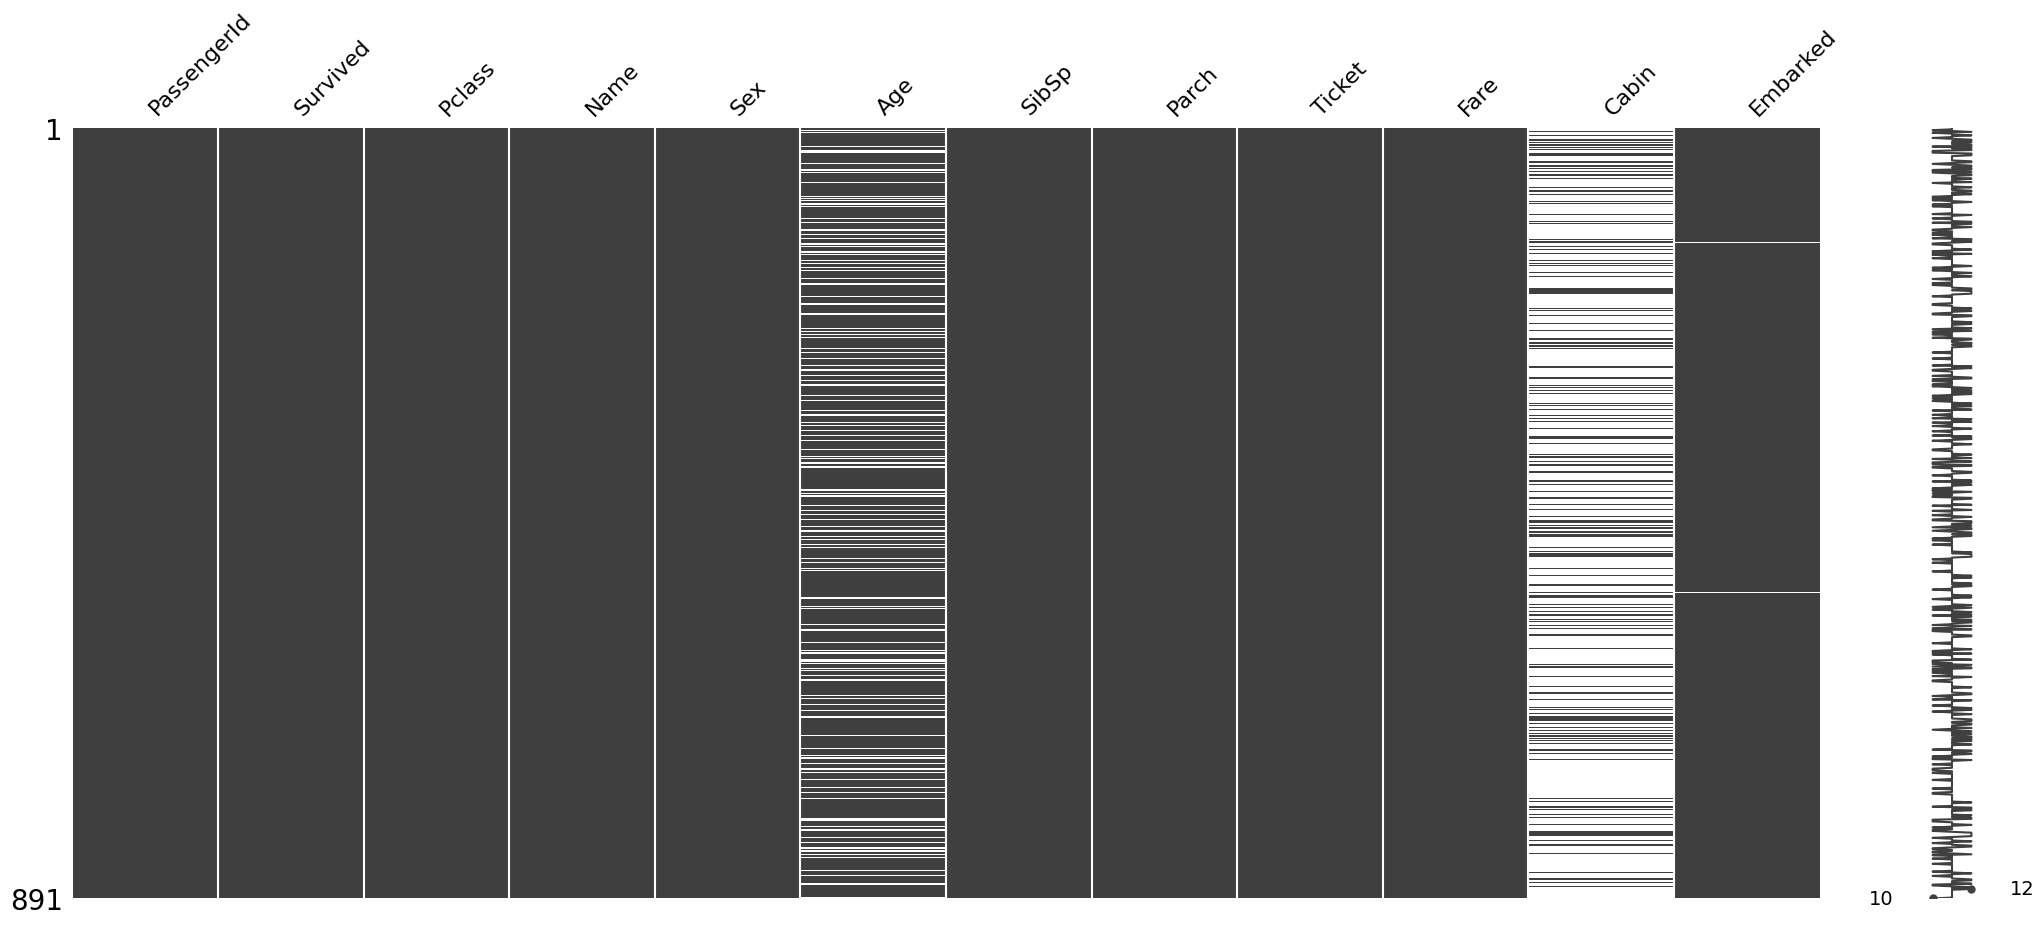

In [16]:
msno.matrix(df.sample(891))

This is actually remarkably clean. Most datasets in business have way more missing values and garbage.

Even so, my intitial plan has been to feed the Age and Sex columns into a Machine Learning 
Algorithm to see if I can get better than the 'gender.csv' which just assumes all females 
survive and all males die.

In [17]:
df_AgeImputed = df
df_AgeImputed_test = df_test

In [18]:
df['Age'].median()

28.0

In [19]:
df_AgeImputed['Age'] = df['Age'].fillna( df['Age'].median() )
df_AgeImputed_test['Age'] = df_test['Age'].fillna( df_test['Age'].median() )

<Axes: >

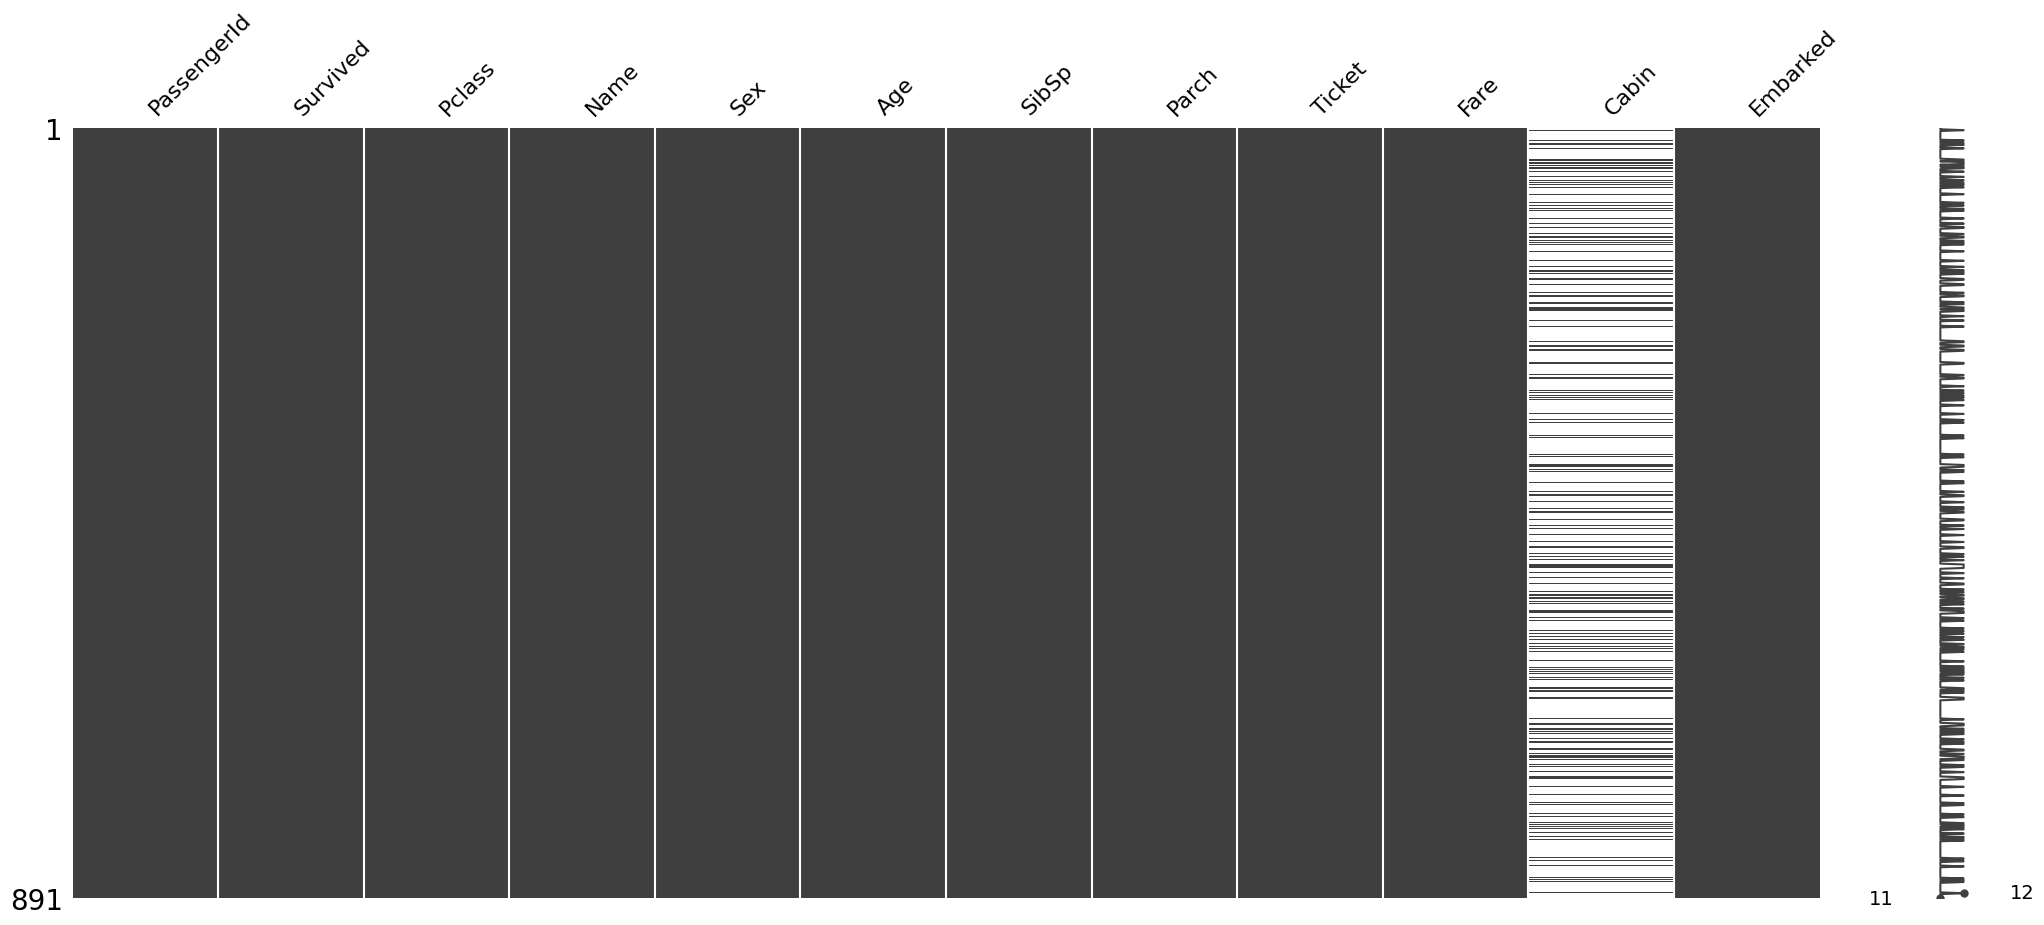

In [20]:
msno.matrix(df_AgeImputed.sample(891))

As you can see, there are now no missing values in the 'Age' column.

In [21]:
# Creating training and target data to fit my model to.
X = df_AgeImputed[['Sex','Age']].to_numpy()
y = df_AgeImputed['Survived'].to_numpy()
X_test = df_AgeImputed_test[['Sex','Age']].to_numpy()

In [22]:
type(X)

numpy.ndarray

In [23]:
def labelEncode(X: np.ndarray) -> np.ndarray:
    for i in range(len(X)):
        for j in range(len(X[i])):
            if X[i,j] == 'male':
                X[i,j] = 0
            if X[i,j] == 'female':
                X[i,j] = 1

labelEncode(X)
labelEncode(X_test)

In [24]:
type(X)

numpy.ndarray

In [25]:
print(X)

[[0 22.0]
 [1 38.0]
 [1 26.0]
 ...
 [1 28.0]
 [0 26.0]
 [0 32.0]]


In [26]:
clf = RandomForestClassifier(max_depth = 2, random_state = 0)
clf.fit(X,y)
predictions = clf.predict(X_test)

In [27]:
type(clf.predict(X_test))

numpy.ndarray

In [34]:
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [29]:
print(type(predictions))

<class 'numpy.ndarray'>


In [35]:
output = pd.DataFrame({ 'PassengerId' : df_AgeImputed_test.PassengerId, 'Survived' : predictions })
output.to_csv('submission.csv')